In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.ticker import MaxNLocator

In [44]:
df1 = pd.read_csv("/Users/lynmartinez/Documents/El_amor_de_tu_vida/Desafio latam/Apoyo_desafio/world-data-2023.csv")
#verificamos las columnas que existen para eliminar las que no son necesarias
df1.columns

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [45]:
#eliminamos las columnas que no son necesarios 
df1 = df1.drop(columns=['Abbreviation', 'Calling Code', 'Capital/Major City', 'Currency-Code', 
                      'Largest city', 'Official language', 'Latitude', 'Longitude'])

In [46]:
df1.columns = df1.columns.str.replace('\n', '')


In [47]:
#verificamos el dataframe resultante 
df1.head()

,Country,Density(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,4.47,...,638.0,$0.43,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273"
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,1.62,...,15.0,$1.12,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593"
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,3.02,...,112.0,$0.95,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100"
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,1.27,...,NaN,$6.63,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873"
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,5.52,...,241.0,$0.71,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025"


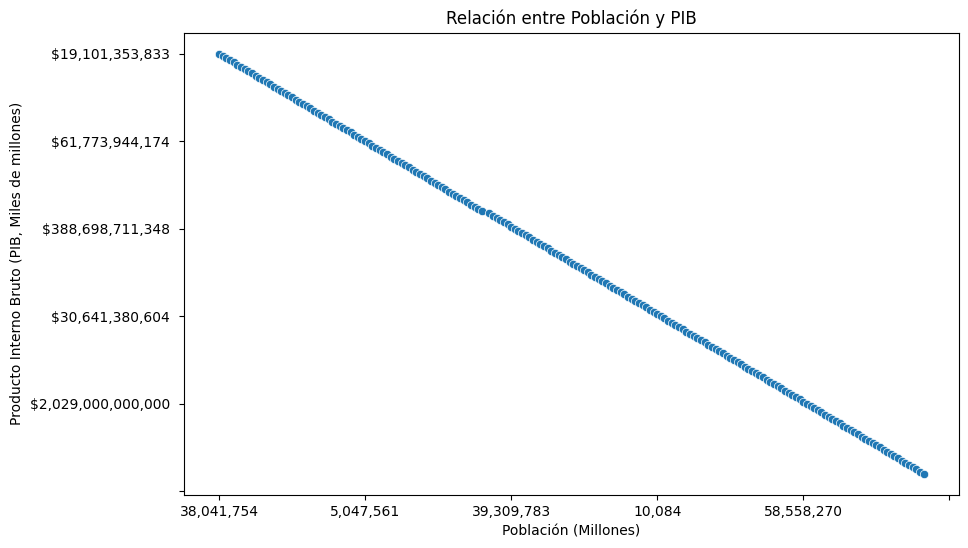

podemos ver la gran relacion entre la cantidad de poblacion y el PIB que hay 


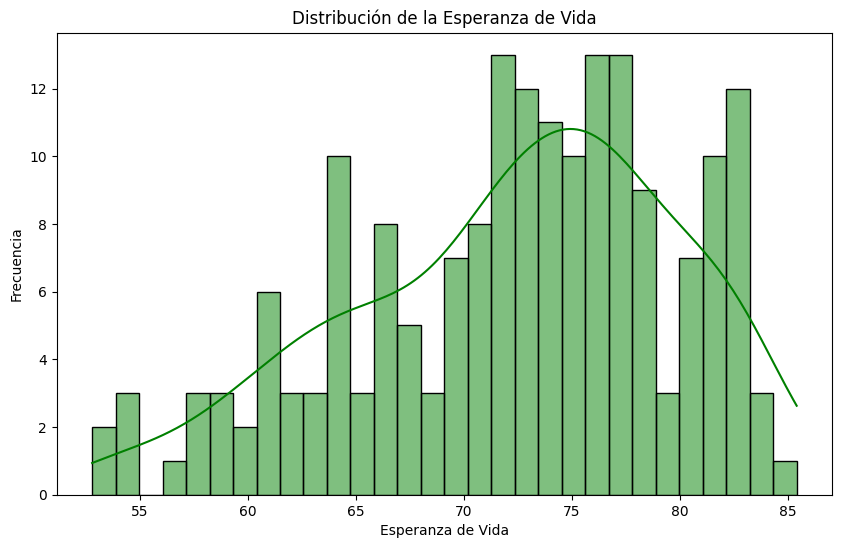

podemos ver la relacion y el indice de vida que existe que todos las personas tienen una esperanza de vida entre 70 a 80 años


In [48]:
# Paso 2 realizaremos los graficos para relacionar los datos 
import matplotlib.ticker as ticker  # Esto nos permitirá formatear los números en los ejes

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
sns.scatterplot(x='Population', y='GDP', data=df1)  # Gráfico de dispersión con los datos limpios

plt.title('Relación entre Población y PIB')  # Título del gráfico
plt.xlabel('Población (Millones)')  # Etiqueta para el eje X
plt.ylabel('Producto Interno Bruto (PIB, Miles de millones)')  # Etiqueta para el eje Y

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))
plt.show()  # Mostramos el gráfico
print("podemos ver la gran relacion entre la cantidad de poblacion y el PIB que hay ")

# Crear un histograma para ver la distribución de la esperanza de vida
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
sns.histplot(df1['Life expectancy'], kde=True, bins=30, color='green')  # Histograma para la esperanza de vida
plt.title('Distribución de la Esperanza de Vida')  # Título del gráfico
plt.xlabel('Esperanza de Vida')  # Etiqueta del eje X (Esperanza de Vida)
plt.ylabel('Frecuencia')  # Etiqueta del eje Y (Frecuencia)
plt.show()  # Mostrar el gráfico

print("podemos ver la relacion y el indice de vida que existe que todos las personas tienen una esperanza de vida entre 70 a 80 años")



In [49]:
# Seleccionamos solo las columnas que son numericas 
df_numeric = df1.select_dtypes(include=[float, int]).columns
print(df_numeric)

# Calcular la matriz de correlación solo para las columnas numéricas
correlation = df1[df_numeric].corr()
print(correlation)



Index(['Birth Rate', 'Fertility Rate', 'Infant mortality', 'Life expectancy',
       'Maternal mortality ratio', 'Physicians per thousand'],
      dtype='object')
                          Birth Rate  Fertility Rate  Infant mortality  \
Birth Rate                  1.000000        0.981069          0.867456   
Fertility Rate              0.981069        1.000000          0.852653   
Infant mortality            0.867456        0.852653          1.000000   
Life expectancy            -0.874747       -0.849153         -0.924675   
Maternal mortality ratio    0.768078        0.779460          0.874135   
Physicians per thousand    -0.740290       -0.683172         -0.691382   

                          Life expectancy  Maternal mortality ratio  \
Birth Rate                      -0.874747                  0.768078   
Fertility Rate                  -0.849153                  0.779460   
Infant mortality                -0.924675                  0.874135   
Life expectancy                  1

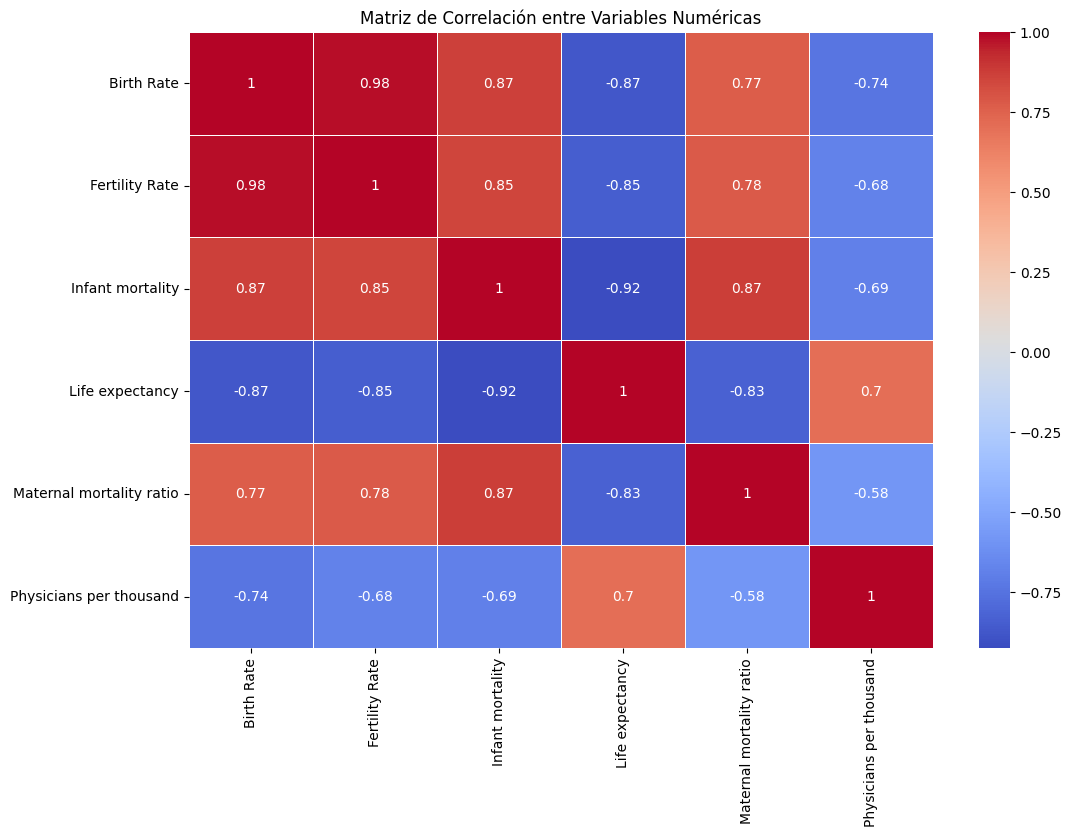

1. La tasa de natalidad (Birth Rate) y la tasa de fertilidad (Fertility Rate) están fuertemente correlacionadas con un coeficiente de 0.98.
   -> Esto indica que a medida que aumenta la tasa de natalidad, también aumenta la tasa de fertilidad de manera significativa.
2. Existe una correlación negativa significativa entre la esperanza de vida (Life expectancy) y la mortalidad infantil (Infant mortality), con un coeficiente de -0.92.
   -> A medida que disminuye la mortalidad infantil, la esperanza de vida tiende a aumentar, lo cual es esperado y refleja un mejor estado de salud en los países.
3. La relación entre la tasa de mortalidad infantil (Infant mortality) y la tasa de mortalidad materna (Maternal mortality ratio) es positiva, con un coeficiente de 0.87.
   -> Los países que tienen una alta mortalidad infantil también tienden a tener una alta mortalidad materna.
4. La correlación entre los médicos por cada mil habitantes (Physicians per thousand) y la esperanza de vida (Life expec

In [50]:

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

print("1. La tasa de natalidad (Birth Rate) y la tasa de fertilidad (Fertility Rate) están fuertemente correlacionadas con un coeficiente de 0.98.")
print("   -> Esto indica que a medida que aumenta la tasa de natalidad, también aumenta la tasa de fertilidad de manera significativa.")

print("2. Existe una correlación negativa significativa entre la esperanza de vida (Life expectancy) y la mortalidad infantil (Infant mortality), con un coeficiente de -0.92.")
print("   -> A medida que disminuye la mortalidad infantil, la esperanza de vida tiende a aumentar, lo cual es esperado y refleja un mejor estado de salud en los países.")

print("3. La relación entre la tasa de mortalidad infantil (Infant mortality) y la tasa de mortalidad materna (Maternal mortality ratio) es positiva, con un coeficiente de 0.87.")
print("   -> Los países que tienen una alta mortalidad infantil también tienden a tener una alta mortalidad materna.")

print("4. La correlación entre los médicos por cada mil habitantes (Physicians per thousand) y la esperanza de vida (Life expectancy) es positiva, con un coeficiente de 0.7.")
print("   -> Esto sugiere que los países con más médicos per cápita tienden a tener una mayor esperanza de vida, lo cual refuerza la importancia del acceso a los servicios de salud.")


In [51]:
# ahora tenemos que verificar que los datos que necestiamos no tienen valores nulos 
print(f"{df1['Birth Rate'].isnull().sum()} valores nulos para Birth Rate")
print(f"{df1['Fertility Rate'].isnull().sum()} valores nulos para Fertility Rate")
print(f"{df1['Infant mortality'].isnull().sum()} valores nulos para Infant mortality")
print(f"{df1['Life expectancy'].isnull().sum()} valores nulos para Life expectancy")
print(f"{df1['Maternal mortality ratio'].isnull().sum()} valores nulos para Maternal mortality ratio")

df_clean = df1.dropna(subset=['Birth Rate', 'Fertility Rate', 'Infant mortality', 'Life expectancy',
       'Maternal mortality ratio'])


# Eliminaremos los  valores atípicos usando el el metodo IQR con esta funcion
def eliminar_atipicos(df, columnas):
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        # Filtrar los datos dentro del rango IQR
        df = df[~((df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR)))]
    return df

columnas = ['Birth Rate', 'Fertility Rate', 'Infant mortality', 'Life expectancy', 'Maternal mortality ratio']

df_clean = eliminar_atipicos(df1,columnas)
df_clean

6 valores nulos para Birth Rate
7 valores nulos para Fertility Rate
6 valores nulos para Infant mortality
8 valores nulos para Life expectancy
14 valores nulos para Maternal mortality ratio


,Country,Density(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,1.62,...,15.0,$1.12,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593"
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,3.02,...,112.0,$0.95,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100"
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,1.27,...,NaN,$6.63,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873"
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,5.52,...,241.0,$0.71,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025"
5,Antigua and Barbuda,223,20.50%,443,0,15.33,557,113.81,1.20%,1.99,...,42.0,$3.04,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vanuatu,25,15.30%,"12,189",NaN,29.60,147,117.13,2.80%,3.78,...,72.0,$1.56,8.90%,0.17,"299,882",69.90%,17.80%,8.50%,4.39%,"76,152"
190,Venezuela,32,24.50%,"912,050","343,000",17.88,"164,175","2,740.27",254.90%,2.27,...,125.0,$0.01,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368"
191,Vietnam,314,39.30%,"331,210","522,000",16.75,"192,668",163.52,2.80%,2.05,...,43.0,$0.73,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140"
192,Yemen,56,44.60%,"527,968","40,000",30.45,"10,609",157.58,8.10%,3.79,...,164.0,NaN,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523"


In [9]:
#despues de esto volvemos a validar los datos haciendo una correlacion para verificar que estan mejor los datos
correlation = df1[df_numeric].corr()
print(correlation)


                          Birth Rate  Fertility Rate  Infant mortality  \
Birth Rate                  1.000000        0.981069          0.867456   
Fertility Rate              0.981069        1.000000          0.852653   
Infant mortality            0.867456        0.852653          1.000000   
Life expectancy            -0.874747       -0.849153         -0.924675   
Maternal mortality ratio    0.768078        0.779460          0.874135   
Physicians per thousand    -0.740290       -0.683172         -0.691382   

                          Life expectancy  Maternal mortality ratio  \
Birth Rate                      -0.874747                  0.768078   
Fertility Rate                  -0.849153                  0.779460   
Infant mortality                -0.924675                  0.874135   
Life expectancy                  1.000000                 -0.831797   
Maternal mortality ratio        -0.831797                  1.000000   
Physicians per thousand          0.703740              

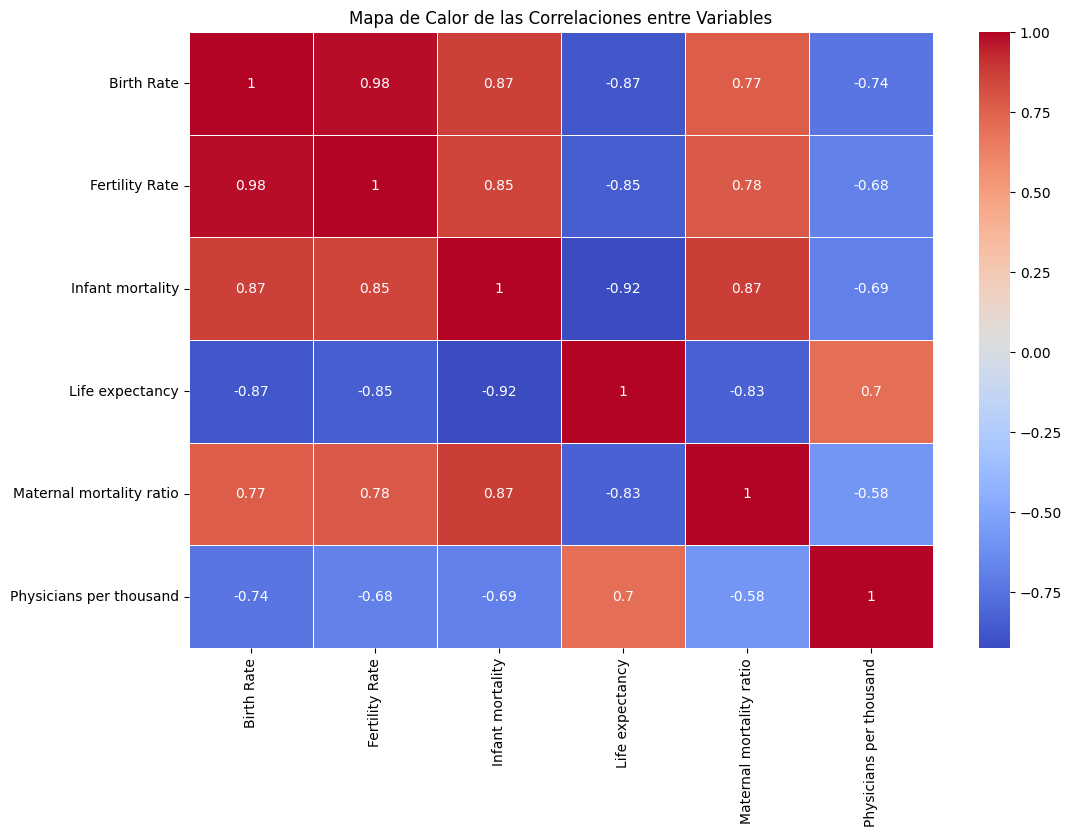

En resumen, tras la limpieza de los datos, las correlaciones siguen siendo significativas pero ligeramente más débiles. Esto puede deberse a la eliminación de valores extremos que, aunque influyentes, pueden no representar la tendencia general de los datos. La eliminación de valores atipicos y valores faltantes ayuda a obtener una visión más robusta y menos sesgada de las relaciones entre variables


In [10]:
# Mostramos las correlaciones en un mapa de calor para verlo mejor (los colores mas oscuros muestran fuerte correlación)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de las Correlaciones entre Variables')
plt.show()

print("En resumen, tras la limpieza de los datos, las correlaciones siguen siendo significativas pero ligeramente más débiles. Esto puede deberse a la eliminación de valores extremos que, aunque influyentes, pueden no representar la tendencia general de los datos. La eliminación de valores atipicos y valores faltantes ayuda a obtener una visión más robusta y menos sesgada de las relaciones entre variables")

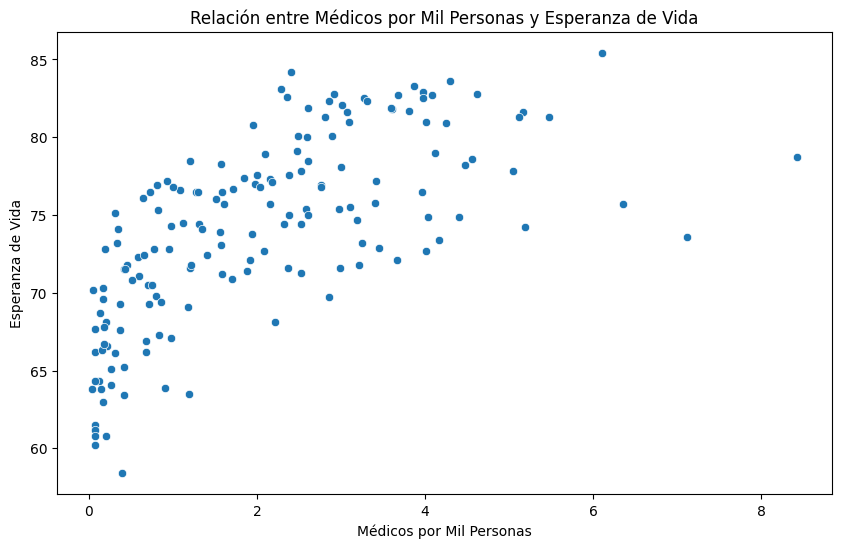

Esta correlación es positiva moderada, sugiriendo que a mayor número de médicos por cada mil habitantes, generalmente se observa una mayor esperanza de vida.
Es decir, mayor acceso a médicos probablemente se traduzca en mejores servicios de salud y mayor atención médica, lo cual contribuye a una mayor longevidad en la población. Este vínculo subraya la importancia de invertir en infraestructura médica y formación de profesionales de salud para mejorar las condiciones de vida


In [11]:
# Paso 6: Comparación entre Médicos por Mil Personas y Esperanza de Vida

# Crear un gráfico de dispersión para comparar Médicos por mil personas y Esperanza de Vida
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physicians per thousand', y='Life expectancy', data=df_clean)
plt.title('Relación entre Médicos por Mil Personas y Esperanza de Vida')
plt.xlabel('Médicos por Mil Personas')
plt.ylabel('Esperanza de Vida')
plt.show()

print("Esta correlación es positiva moderada, sugiriendo que a mayor número de médicos por cada mil habitantes, generalmente se observa una mayor esperanza de vida.")
print("Es decir, mayor acceso a médicos probablemente se traduzca en mejores servicios de salud y mayor atención médica, lo cual contribuye a una mayor longevidad en la población. Este vínculo subraya la importancia de invertir en infraestructura médica y formación de profesionales de salud para mejorar las condiciones de vida")

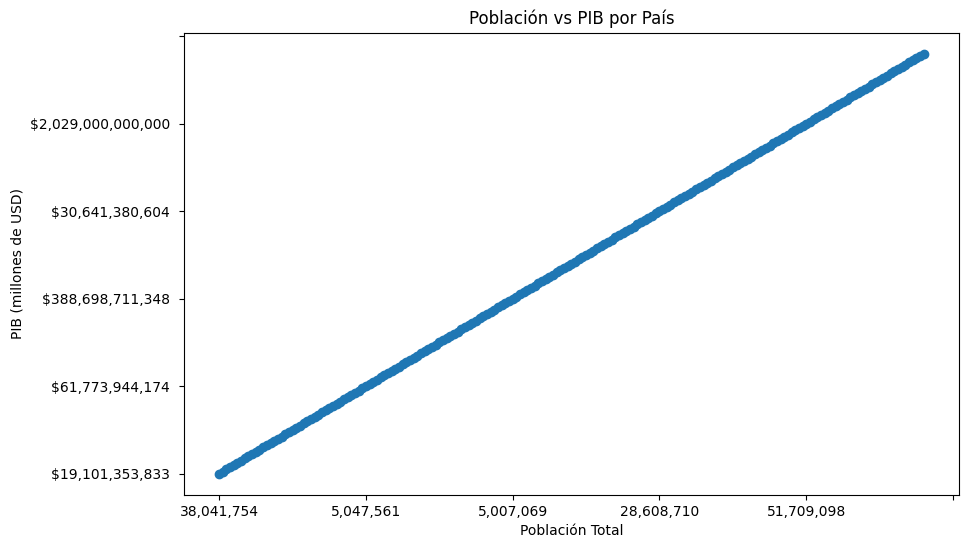

Elegimos un scatter plot para visualizar la relación entre población y PIB, ya que permite observar correlaciones y patrones entre las dos variables. Y tal como lo vimos al principio, existe una gran relacion entre estas dos variables, a mayor densidad de piblacion, mayor el PIB.


In [20]:
# Paso 7: Gráfico para Representar la Población Total y el PIB

# Eliminar valores faltantes
df_clean = df1.dropna(subset=['Population', 'GDP'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Population'], df_clean['GDP'])
plt.xlabel('Población Total')
plt.ylabel('PIB (millones de USD)')
plt.title('Población vs PIB por País')
# Reducir la cantidad de etiquetas en los ejes
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))
# Mostrar el gráfico
plt.show()

print("Elegimos un scatter plot para visualizar la relación entre población y PIB, ya que permite observar correlaciones y patrones entre las dos variables. Y tal como lo vimos al principio, existe una gran relacion entre estas dos variables, a mayor densidad de piblacion, mayor el PIB.")

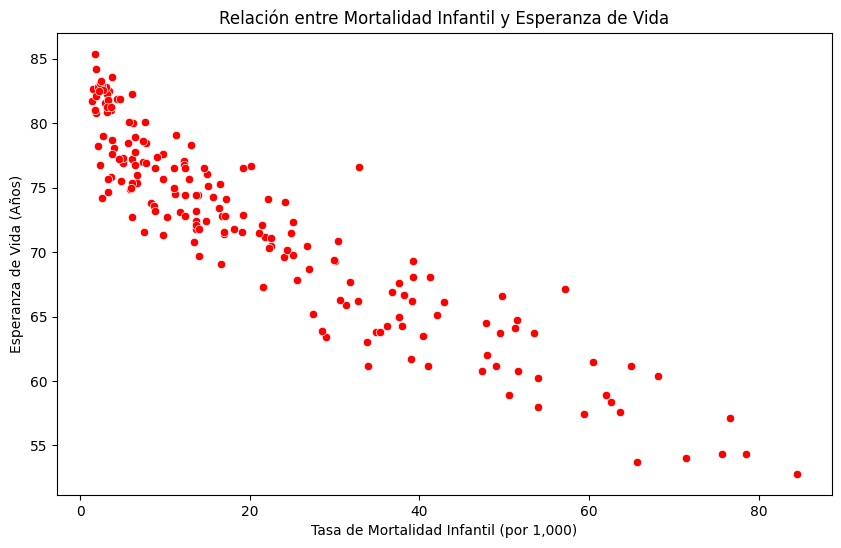

In [26]:
# Paso 8: Escoger otro par de variables, limpiarlas, y analizar su relación

# Revisemos en detalle la correlacion de Infant Mortality y Life Expectancy la cual ya esta limpios

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
sns.scatterplot(x='Infant mortality', y='Life expectancy', data=df_clean, color = 'red')  # Gráfico de dispersión con los datos limpios

plt.title('Relación entre Mortalidad Infantil y Esperanza de Vida')
plt.xlabel('Tasa de Mortalidad Infantil (por 1,000)')
plt.ylabel('Esperanza de Vida (Años)')

plt.show()  # Mostramos el gráfico

# Conclusiones del gráfico de dispersión entre Mortalidad Infantil y Esperanza de Vida

print("1. Existe una correlación negativa clara entre la tasa de mortalidad infantil y la esperanza de vida.")
print("   -> A medida que aumenta la mortalidad infantil, la esperanza de vida tiende a disminuir considerablemente.")
print("   -> Este comportamiento es esperado: en países donde la mortalidad infantil es alta, las condiciones de salud tienden a ser deficientes, lo que reduce la esperanza de vida general.")

print("2. En los países con tasas bajas de mortalidad infantil (menos de 10 por cada 1,000 nacimientos), la esperanza de vida se sitúa consistentemente por encima de los 75 años.")
print("   -> Esto refuerza la idea de que la mortalidad infantil es un buen indicador de la calidad de los sistemas de salud en los países.")

print("3. A medida que la tasa de mortalidad infantil se acerca o supera los 60 por cada 1,000 nacimientos, la esperanza de vida desciende a niveles por debajo de 60 años.")
print("   -> Los países con alta mortalidad infantil presentan serios problemas de salud pública que afectan la longevidad de la población.")

print("4. Este gráfico destaca la importancia de mejorar las condiciones de salud pública y reducir la mortalidad infantil para aumentar la esperanza de vida en los países más afectados.")


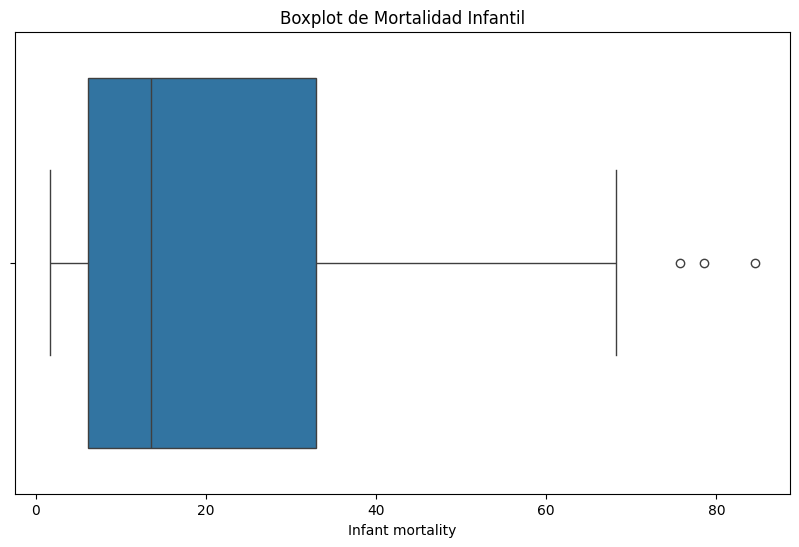

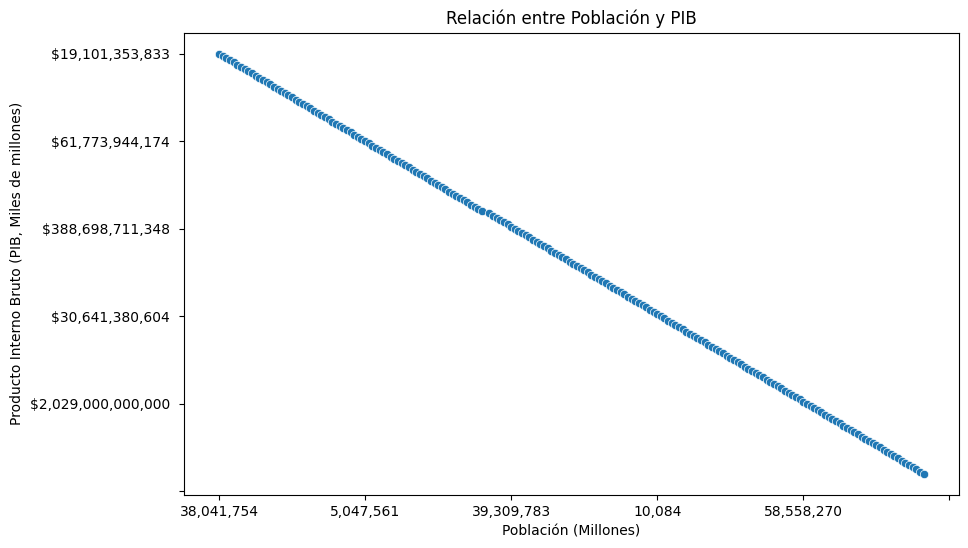

Se observa una correlación positiva entre el PIB y la población. Los países con mayor población tienden a tener un PIB más elevado, lo cual es consistente con la tendencia global.


In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Infant mortality', data=df_clean)
plt.title('Boxplot de Mortalidad Infantil')
plt.show()


# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
sns.scatterplot(x='Population', y='GDP', data=df1)  # Gráfico de dispersión con los datos limpios

plt.title('Relación entre Población y PIB')  # Título del gráfico
plt.xlabel('Población (Millones)')  # Etiqueta para el eje X
plt.ylabel('Producto Interno Bruto (PIB, Miles de millones)')  # Etiqueta para el eje Y

ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))
ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=6))
plt.show()  # Mostramos el gráfico

print("Se observa una correlación positiva entre el PIB y la población. Los países con mayor población tienden a tener un PIB más elevado, lo cual es consistente con la tendencia global.")

